## Practice: Basic Artificial Neural Networks
Credits: this notebook belongs to [Practical DL](https://docs.google.com/forms/d/e/1FAIpQLScvrVtuwrHSlxWqHnLt1V-_7h2eON_mlRR6MUb3xEe5x9LuoA/viewform?usp=sf_link) course by Yandex School of Data Analysis.

We will start working with neural networks on the practice session. Your homework will be to finish the implementation of the layers.

Our goal is simple, yet an actual implementation may take some time :). We are going to write an Artificial Neural Network (almost) from scratch. The software design was heavily inspired by [PyTorch](http://pytorch.org) which is the main framework of our course 

In [12]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
plt.style.use('dark_background')

# Framework

Implement everything in `modules.ipynb`. Read all the comments thoughtfully to ease the pain. Please try not to change the prototypes.

Do not forget, that each module should return **AND** store `output` and `gradInput`.

The typical assumption is that `module.backward` is always executed after `module.forward`,
so `output` is stored, this would be useful for `SoftMax`. 

### Tech note
Prefer using `np.multiply`, `np.add`, `np.divide`, `np.subtract` instead of `*`,`+`,`/`,`-` for better memory handling.

Example: suppose you allocated a variable 

```
a = np.zeros(...)
```
So, instead of
```
a = b + c  # will be reallocated, GC needed to free
``` 
You can use: 
```
np.add(b,c,out = a) # puts result in `a`
```

In [ ]:
# (re-)load layers
%run modules.ipynb

# Toy example

Use this example to debug your code, start with logistic regression and then test other layers. You do not need to change anything here. This code is provided for you to test the layers. Also it is easy to use this code in MNIST task.

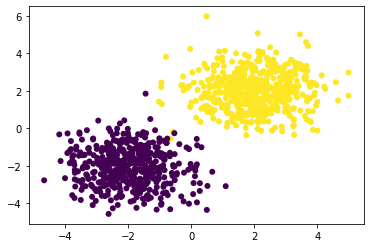

In [ ]:
# Generate some data
N = 500

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])

Y = np.concatenate([np.ones(N),np.zeros(N)])[:,None]
Y = np.hstack([Y, 1-Y])

X = np.vstack([X1,X2])
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')

Define a **logistic regression** for debugging. 

In [ ]:
# net = Sequential()
# net.add(Linear(2, 2))
# net.add(LogSoftMax())

# criterion = ClassNLLCriterion()

# print(net)

# Test something like that then 

net = Sequential()
net.add(Linear(2, 4))
net.add(ReLU())
net.add(Linear(4, 2))
net.add(LogSoftMax())
print(net)

Linear 2 -> 4
ReLU
Linear 4 -> 2
LogSoftMax



Start with batch_size = 1000 to make sure every step lowers the loss, then try stochastic version.

In [ ]:
# Iptimizer params
optimizer_config = {'learning_rate' : 1e-2, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 300
batch_size = 1000

In [ ]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

### Train

Basic training loop. Examine it.

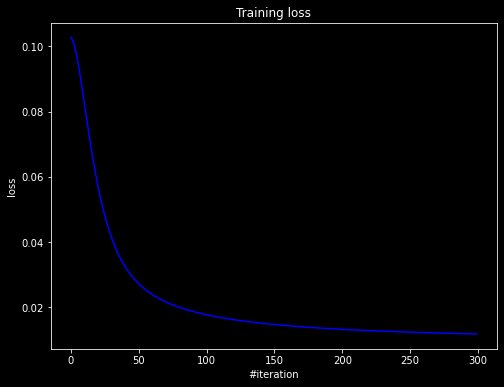

Current loss: 0.011840


In [ ]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X, Y), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

# Digit classification 

We are using old good [MNIST](http://yann.lecun.com/exdb/mnist/) as our dataset.

In [81]:
import mnist
X_train, y_train, X_val, y_val, X_test, y_test = mnist.load_dataset()

One-hot encode the labels first.

In [82]:
X_train = X_train.reshape(50000, -1)
X_val = X_val.reshape(10000,-1)
X_test = X_test.reshape(10000,-1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [28]:
# Your code goes here. ################################################
from sklearn.preprocessing import OneHotEncoder# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
y_train = enc.fit_transform(y_train.reshape(-1, 1)).toarray()
y_val = enc.transform(y_val.reshape(-1, 1)).toarray()



- **Compare** `ReLU`, `ELU`, `LeakyReLU`, `SoftPlus` activation functions. 
You would better pick the best optimizer params for each of them, but it is overkill for now. Use an architecture of your choice for the comparison.
- **Try** inserting `BatchNormalization` (folowed by `ChannelwiseScaling`) between `Linear` module and activation functions.
- Plot the losses both from activation functions comparison and `BatchNormalization` comparison on one plot. Please find a scale (log?) when the lines are distinguishable, do not forget about naming the axes, the plot should be goodlooking.
- Plot the losses for two networks: one trained by momentum_sgd, another one trained by Adam. Which one performs better?
- Hint: good logloss for MNIST should be around 0.5. 

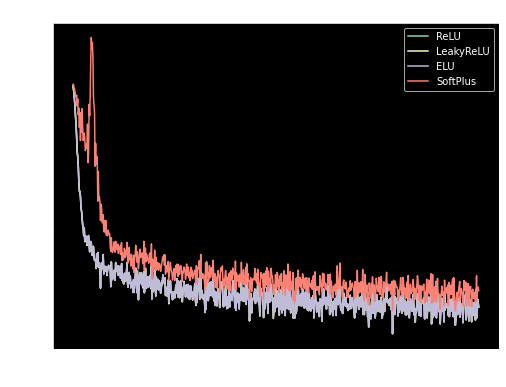

Current loss ReLU: 0.298467
Current loss ELU: 0.299093
Current loss LeakyReLU: 0.298273
Current loss SoftPlus: 0.348077


In [ ]:
# Your code goes here. ################################################
# Iptimizer params
optimizer_config = {'learning_rate' : 5e-2, 'momentum': 0.9}
optimizer_state_ReLu = {}
optimizer_state_ELU = {}
optimizer_state_LeakyReLu = {}
optimizer_state_SoftPlus = {}

ReLu_mod = Sequential()
ELU_mod = Sequential()
LeakyReLU_mod = Sequential()
SoftPlus_mod = Sequential()

ReLu_mod.add(ReLU())
ReLu_mod.add(Linear(784, 10))
ReLu_mod.add(LogSoftMax())
#ReLu_mod.add(BatchNormalization())

ELU_mod.add(ELU())
ELU_mod.add(Linear(784, 10))
ELU_mod.add(LogSoftMax())
#ELU_mod.add(BatchNormalization())

LeakyReLU_mod.add(LeakyReLU())
LeakyReLU_mod.add(Linear(784, 10))
LeakyReLU_mod.add(LogSoftMax())
#LeakyReLU_mod.add(BatchNormalization())

SoftPlus_mod.add(SoftPlus())
SoftPlus_mod.add(Linear(784, 10))
SoftPlus_mod.add(LogSoftMax())
#SoftPlus_mod.add(BatchNormalization())


criterion_ReLu = ClassNLLCriterion()
criterion_ELU = ClassNLLCriterion()
criterion_LeakyReLu = ClassNLLCriterion()
criterion_SoftPlus = ClassNLLCriterion()

loss_history_ReLu = []
loss_history_ELU = []
loss_history_LeakyReLu = []
loss_history_SoftPlus = []


n_epoch = 15
batch_size = 1000

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X_train, y_train), batch_size):
        
        ReLu_mod.zeroGradParameters()
        ELU_mod.zeroGradParameters()
        LeakyReLU_mod.zeroGradParameters()
        SoftPlus_mod.zeroGradParameters()
        
        # Forward
        predictions_ReLu = ReLu_mod.forward(x_batch)
        loss_ReLu = criterion_ReLu.forward(predictions_ReLu, y_batch)
        
        predictions_ELU = ELU_mod.forward(x_batch)
        loss_ELU = criterion_ELU.forward(predictions_ELU, y_batch)
        
        predictions_LeakyReLU = LeakyReLU_mod.forward(x_batch)
        loss_LeakyReLU = criterion_LeakyReLu.forward(predictions_LeakyReLU, y_batch)
        
        predictions_SoftPlus = SoftPlus_mod.forward(x_batch)
        loss_SoftPlus = criterion_SoftPlus.forward(predictions_SoftPlus, y_batch)
    
        # Backward
        dp_ReLu = criterion_ReLu.backward(predictions_ReLu, y_batch)
        ReLu_mod.backward(x_batch, dp_ReLu)
        
        dp_ELU = criterion_ELU.backward(predictions_ELU, y_batch)
        ELU_mod.backward(x_batch, dp_ELU)
        
        dp_LeakyReLu = criterion_LeakyReLu.backward(predictions_LeakyReLU, y_batch)
        LeakyReLU_mod.backward(x_batch, dp_LeakyReLu)
        
        dp_SoftPlus = criterion_SoftPlus.backward(predictions_SoftPlus , y_batch)
        SoftPlus_mod.backward(x_batch, dp_SoftPlus)
        
        # Update weights
        sgd_momentum(ReLu_mod.getParameters(),  ReLu_mod.getGradParameters(), optimizer_config, optimizer_state_ReLu)
        
        sgd_momentum(ELU_mod.getParameters(),  ELU_mod.getGradParameters(), optimizer_config, optimizer_state_ELU)
        
        sgd_momentum(LeakyReLU_mod.getParameters(),  LeakyReLU_mod.getGradParameters(), optimizer_config, optimizer_state_LeakyReLu)
        
        sgd_momentum(SoftPlus_mod.getParameters(),  SoftPlus_mod.getGradParameters(), optimizer_config, optimizer_state_SoftPlus)
        
        
        loss_history_ReLu.append(loss_ReLu)
        loss_history_LeakyReLu.append(loss_LeakyReLU)
        loss_history_ELU.append(loss_ELU)
        loss_history_SoftPlus.append(loss_SoftPlus)
        

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(np.log(loss_history_ReLu), label='ReLU')
    plt.plot(np.log(loss_history_LeakyReLu), label = 'LeakyReLU')
    plt.plot(np.log(loss_history_ELU), label = 'ELU')
    plt.plot(np.log(loss_history_SoftPlus), label = 'SoftPlus')
    plt.legend()
    plt.show()
    
    print('Current loss ReLU: %f' % loss_ReLu)
    print('Current loss ELU: %f' % loss_ELU)
    print('Current loss LeakyReLU: %f' % loss_LeakyReLU)
    print('Current loss SoftPlus: %f' % loss_SoftPlus)

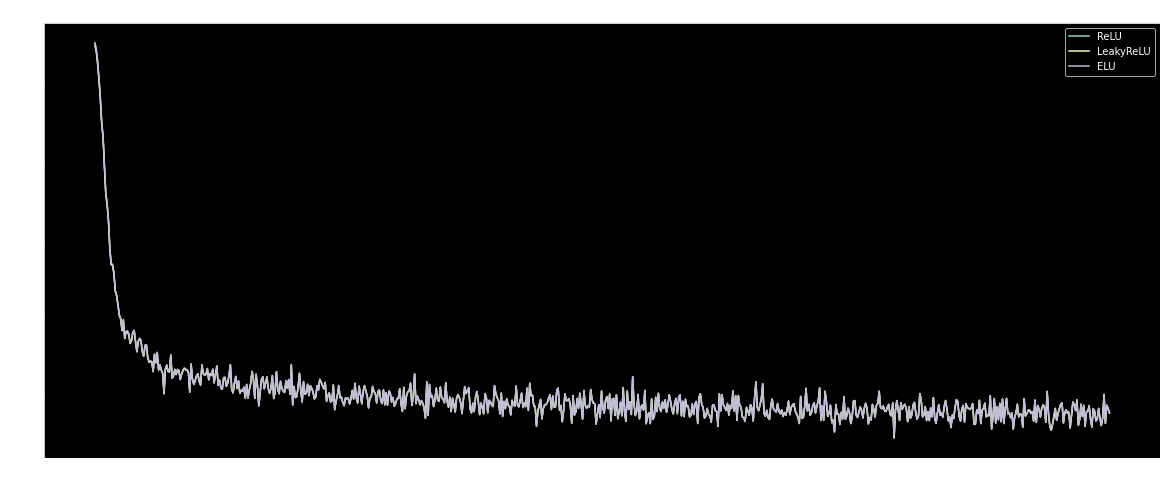

In [ ]:
display.clear_output(wait=True)
plt.figure(figsize=(20, 8))

plt.title("Training loss")
plt.xlabel("#iteration")
plt.ylabel("loss")
plt.plot(3**np.log10(loss_history_ReLu), label='ReLU')
plt.plot(3**np.log10(loss_history_LeakyReLu), label = 'LeakyReLU')
plt.plot(3**np.log10(loss_history_ELU), label = 'ELU')
#plt.plot(3**np.log10(loss_history_SoftPlus), label = 'SoftPlus')
plt.legend()
plt.show()

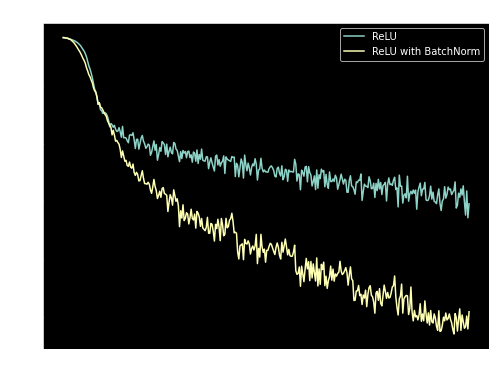

Current loss ReLU: 0.129805
Current loss ReLU with Batchnorm: 0.019979


KeyboardInterrupt: ignored

In [ ]:
# Optimizer params
optimizer_config = {'learning_rate' : 5e-2, 'momentum': 0.9}
optimizer_state_ReLu = {}
optimizer_state_Batch_ReLu = {}

ReLu_mod = Sequential()
Batch_ReLu_mod = Sequential()

ReLu_mod.add(Linear(784, 784))
ReLu_mod.add(ReLU())

ReLu_mod.add(Linear(784, 784))
ReLu_mod.add(ReLU())

ReLu_mod.add(Linear(784, 10))
ReLu_mod.add(LogSoftMax())

Batch_ReLu_mod.add(Linear(784,784))
Batch_ReLu_mod.add(ReLU())
Batch_ReLu_mod.add(BatchNormalization(0.4))
Batch_ReLu_mod.add(ChannelwiseScaling(784))

Batch_ReLu_mod.add(Linear(784,784))
Batch_ReLu_mod.add(ReLU())
Batch_ReLu_mod.add(BatchNormalization(0.4))
Batch_ReLu_mod.add(ChannelwiseScaling(784))

Batch_ReLu_mod.add(Linear(784,10))
Batch_ReLu_mod.add(BatchNormalization(0.4))
Batch_ReLu_mod.add(ChannelwiseScaling(10))
Batch_ReLu_mod.add(LogSoftMax())


criterion_ReLu = ClassNLLCriterion()
criterion_Batch = ClassNLLCriterion()


loss_history_ReLu = []
loss_history_Batch = []


n_epoch = 15
batch_size = 1000

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X_train, y_train), batch_size):
        
        ReLu_mod.zeroGradParameters()
        Batch_ReLu_mod.zeroGradParameters()
        
        # Forward
        predictions_ReLu = ReLu_mod.forward(x_batch)
        loss_ReLu = criterion_ReLu.forward(predictions_ReLu, y_batch)
        
        predictions_Batch = Batch_ReLu_mod.forward(x_batch)
        loss_Batch = criterion_Batch.forward(predictions_Batch, y_batch)
        
        # Backward
        dp_ReLu = criterion_ReLu.backward(predictions_ReLu, y_batch)
        ReLu_mod.backward(x_batch, dp_ReLu)
        
        dp_Batch = criterion_Batch.backward(predictions_Batch, y_batch)
        Batch_ReLu_mod.backward(x_batch, dp_Batch)
        
        # Update weights
        sgd_momentum(ReLu_mod.getParameters(),  ReLu_mod.getGradParameters(), optimizer_config, optimizer_state_ReLu)
        
        sgd_momentum(Batch_ReLu_mod.getParameters(),  Batch_ReLu_mod.getGradParameters(), optimizer_config, optimizer_state_Batch_ReLu)
        
        
        loss_history_ReLu.append(loss_ReLu)
        loss_history_Batch.append(loss_Batch)
                

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(np.log(loss_history_ReLu), label='ReLU')
    plt.plot(np.log(loss_history_Batch), label = 'ReLU with BatchNorm')
    plt.legend()
    plt.show()
    
    print('Current loss ReLU: %f' % loss_ReLu)
    print('Current loss ReLU with Batchnorm: %f' % loss_Batch)

Write your personal opinion on the activation functions, think about computation times too. Does `BatchNormalization` help?

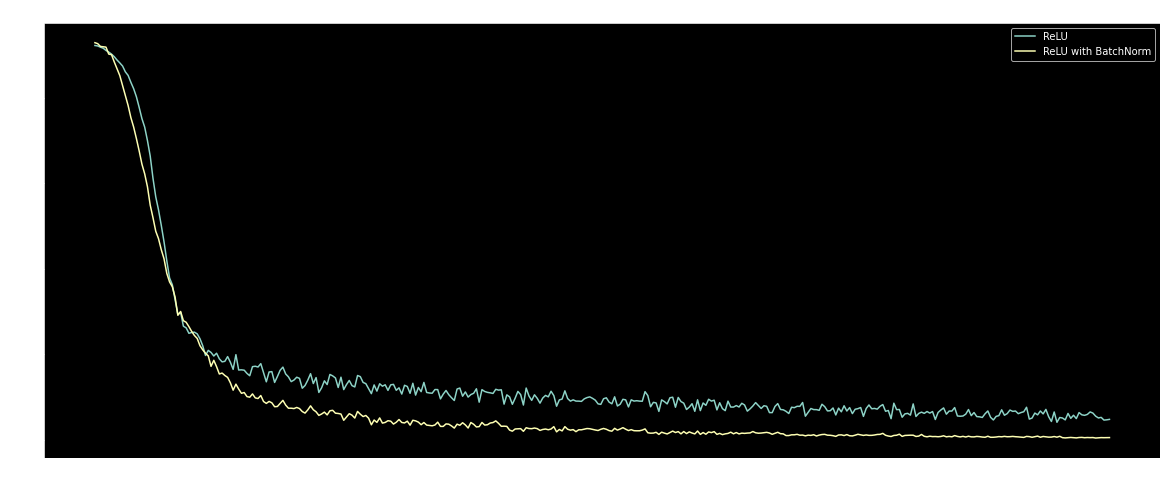

In [ ]:
display.clear_output(wait=True)
plt.figure(figsize=(20, 8))
    
plt.title("Training loss")
plt.xlabel("#iteration")
plt.ylabel("loss")
plt.plot(np.asarray(loss_history_ReLu), label='ReLU')
plt.plot(np.asarray(loss_history_Batch), label = 'ReLU with BatchNorm')
plt.legend()
plt.show()

As we can see from first two plots it's better to use ReLU(0.298467), ELU (0.299093 or LeakyReLU(0.298273). It's pretty hard to choose scale that makes their loss lines distinguishable. But according to loss numbers it's better to to use ReLU which also easyer to compute.

Plot above shows us that BatchNormalization helps a lot. It reduces loss noise and improve convergence, so our neural model is more stable.



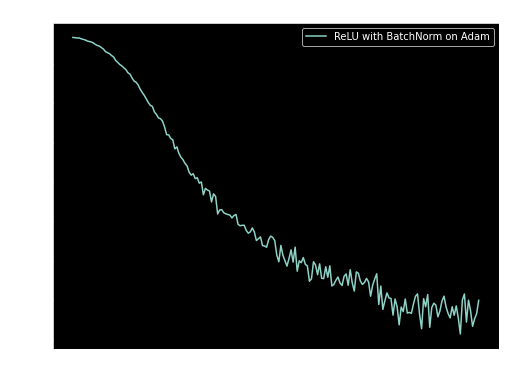

Current loss ReLU: 0.119697
Current loss ReLU with Batchnorm: 0.081907


KeyboardInterrupt: ignored

In [ ]:
# Optimizer params
#optimizer_config = {'learning_rate' : 5e-2, 'momentum': 0.9}
adam_config = {'learning_rate':5e-2, 'beta1':0.9, 'beta2':0.9, 'epsilon':1e-1}
#optimizer_state_ReLu = {}
adam_state_ReLu = {}

Batch_ReLu_mod = Sequential()

Batch_ReLu_mod.add(Linear(784,784))
Batch_ReLu_mod.add(ReLU())
Batch_ReLu_mod.add(BatchNormalization(0.4))
Batch_ReLu_mod.add(ChannelwiseScaling(784))

Batch_ReLu_mod.add(Linear(784,784))
Batch_ReLu_mod.add(ReLU())
Batch_ReLu_mod.add(BatchNormalization(0.4))
Batch_ReLu_mod.add(ChannelwiseScaling(784))

Batch_ReLu_mod.add(Linear(784,10))
Batch_ReLu_mod.add(BatchNormalization(0.4))
Batch_ReLu_mod.add(ChannelwiseScaling(10))
Batch_ReLu_mod.add(LogSoftMax())


#criterion_ReLu = ClassNLLCriterion()
criterion_Batch = ClassNLLCriterion()


#loss_history_ReLu = []
loss_history_Batch = []


n_epoch = 15
batch_size = 1000

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X_train, y_train), batch_size):
        
        #ReLu_mod.zeroGradParameters()
        Batch_ReLu_mod.zeroGradParameters()
        
        # Forward
        # predictions_ReLu = ReLu_mod.forward(x_batch)
        # loss_ReLu = criterion_ReLu.forward(predictions_ReLu, y_batch)
        
        predictions_Batch = Batch_ReLu_mod.forward(x_batch)
        loss_Batch = criterion_Batch.forward(predictions_Batch, y_batch)
        
        # Backward
        # dp_ReLu = criterion_ReLu.backward(predictions_ReLu, y_batch)
        # ReLu_mod.backward(x_batch, dp_ReLu)
        
        dp_Batch = criterion_Batch.backward(predictions_Batch, y_batch)
        Batch_ReLu_mod.backward(x_batch, dp_Batch)
        
        # Update weights
        # sgd_momentum(ReLu_mod.getParameters(),  ReLu_mod.getGradParameters(), optimizer_config, optimizer_state_ReLu)
        
        # sgd_momentum(Batch_ReLu_mod.getParameters(),  Batch_ReLu_mod.getGradParameters(), optimizer_config, optimizer_state_Batch_ReLu)
        
        adam_optimizer(Batch_ReLu_mod.getParameters(),  Batch_ReLu_mod.getGradParameters(), 
                       adam_config, adam_state_ReLu)
        
        #loss_history_ReLu.append(loss_ReLu)
        loss_history_Batch.append(loss_Batch)
                

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    #plt.plot(np.log(loss_history_ReLu), label='ReLU')
    plt.plot(np.log(loss_history_Batch), label = 'ReLU with BatchNorm on Adam')
    plt.legend()
    plt.show()
    
    print('Current loss ReLU: %f' % loss_ReLu)
    print('Current loss ReLU with Batchnorm: %f' % loss_Batch)

In [ ]:
y_batch.shape

(1000, 10)

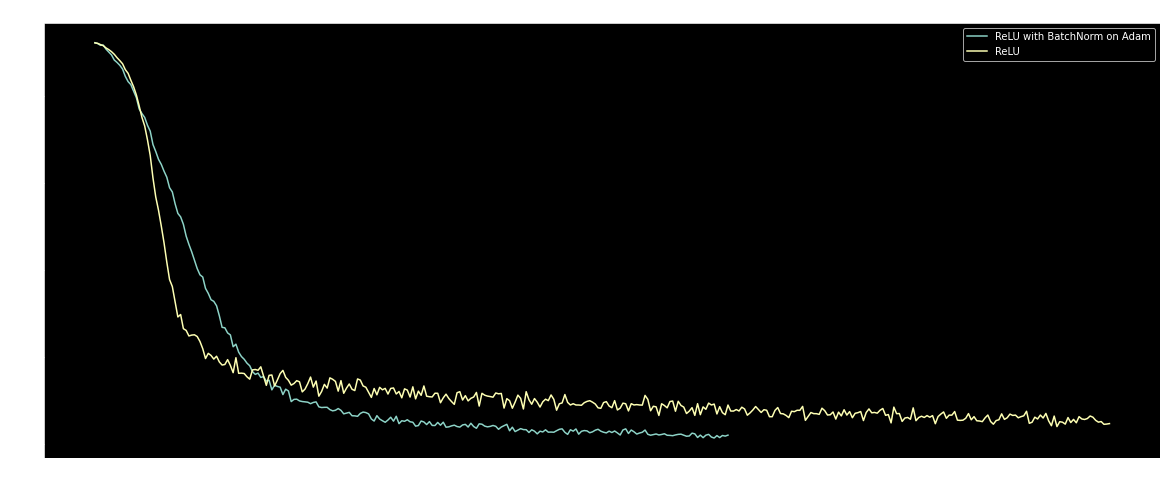

Current loss ReLU with Batchnorm: 0.038061


In [ ]:
display.clear_output(wait=True)
plt.figure(figsize=(20, 8))
    
plt.title("Training loss")
plt.xlabel("#iteration")
plt.ylabel("loss")
plt.plot(np.asarray(loss_history_Batch), label = 'ReLU with BatchNorm on Adam')
plt.plot(np.asarray(loss_history_ReLu), label='ReLU')
plt.legend()
plt.show()

print('Current loss ReLU with Batchnorm: %f' % loss_Batch)

From plot above we can see that adam_optimizer peforms better loss then SGD

**Finally**, use all your knowledge to build a super cool model on this dataset. Use **dropout** to prevent overfitting, play with **learning rate decay**. You can use **data augmentation** such as rotations, translations to boost your score. Use your knowledge and imagination to train a model. Don't forget to call `training()` and `evaluate()` methods to set desired behaviour of `BatchNormalization` and `Dropout` layers.

In [27]:
# Your code goes here. ################################################
features = X_test.shape[1]
finalnet = Sequential()

finalnet.add(Linear(features, features*2))
finalnet.add(ReLU())
finalnet.add(BatchNormalization(0.9))
#finalnet.add(ChannelwiseScaling(features*2))
finalnet.add(Dropout(0.6))

finalnet.add(Linear(features*2, features*2))
finalnet.add(ReLU())
finalnet.add(BatchNormalization(0.9))
finalnet.add(Dropout(0.5))

finalnet.add(Linear(features*2, features*2))
finalnet.add(ReLU())
finalnet.add(BatchNormalization(0.9))
finalnet.add(Dropout(0.5))

finalnet.add(Linear(features*2, 10))
finalnet.add(LogSoftMax())

In [ ]:
features

784

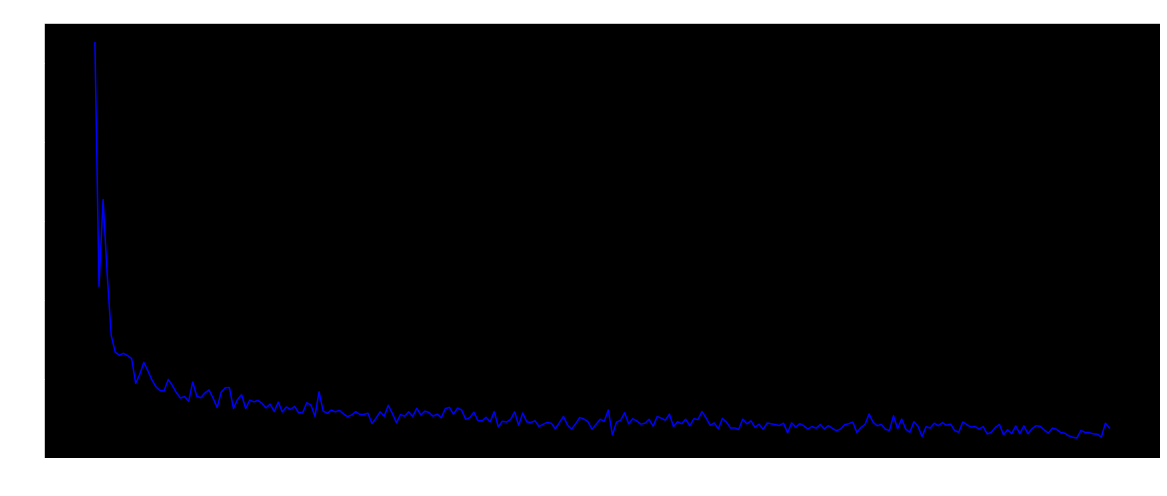

Epoch:  4
Current train loss: 0.187110


In [28]:
adam_config = {'learning_rate':8e-2, 'beta1':0.9, 'beta2':0.95, 'epsilon':1e-1}
loss_history = []
adam_state = {}
criterion = ClassNLLCriterion()
#val_criterion = ClassNLLCriterion()

finalnet.train()

batch_size = 1000
n_epoch = 5

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X_train, y_train), batch_size):
        
        finalnet.zeroGradParameters()
        
        # Forward
        predictions = finalnet.forward(x_batch)
        #val_predictions = finalnet.forward(X_val)
        loss = criterion.forward(predictions, y_batch)
        #val_loss = val_criterion.forward(val_predictions, y_val)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        finalnet.backward(x_batch, dp)
        
        # Update weights
        adam_optimizer(finalnet.getParameters(), 
                     finalnet.getGradParameters(), 
                     adam_config,
                     adam_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(20, 8))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    print('Epoch: ', i)
    print('Current train loss: %f' % loss)
    #print('Current val loss: %f' % val_loss)

Print here your accuracy on test set. It should be around 90%.

In [36]:
# Your answer goes here. ################################################
from sklearn.metrics import accuracy_score
finalnet.evaluate()
accuracy_score(y_test, enc.inverse_transform(finalnet.forward(X_test)))

0.9506

### Comparing with PyTorch implementation
The last (and maybe the easiest step after compared to the previous tasks: build a network with the same architecture as above now with PyTorch.

You can refer to the `week0_09` or `Lab3_part2` notebooks for hints.

__Good Luck!__

In [1]:
# Your beautiful code here.
import torch
import torchvision
import time
from torchvision import transforms

from torch import nn
from torch.nn import functional as F

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
device

'cuda'

In [84]:
train_iter = iter(train_loader)
print(type(train_iter))

images, labels = train_iter.next()

print('images shape on batch size = {}'.format(images.size()))
print('labels shape on batch size = {}'.format(labels.size()))

# plt.imshow(grid.numpy().transpose((1, 2, 0)))
# plt.axis('off')
# plt.title(labels.numpy());

<class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>
images shape on batch size = torch.Size([1000, 784])
labels shape on batch size = torch.Size([1000])


In [83]:
import torch.utils.data as data_utils

train = data_utils.TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train.astype(int)))
train_loader = data_utils.DataLoader(train, batch_size=1000, shuffle=True)

val = data_utils.TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val.astype(int)))
val_loader = data_utils.DataLoader(val, batch_size=1000, shuffle=False)

In [90]:
def plot_train_process(train_loss, val_loss, val_accuracy):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_title('Loss')
    axes[0].plot(train_loss, label='train')
    axes[0].plot(val_loss, label='validation')
    axes[0].legend()

    axes[1].set_title('Validation accuracy')
    axes[1].plot(val_accuracy)

In [86]:
def train_model(model, train_loader, val_loader, loss_fn, opt, n_epochs: int, device=device):
    '''
    model: нейросеть для обучения,
    train_loader, val_loader: загрузчики данных
    loss_fn: целевая метрика (которую будем оптимизировать)
    opt: оптимизатор (обновляет веса нейросети)
    n_epochs: кол-во эпох, полных проходов датасета
    '''
    train_loss = []
    val_loss = []
    val_accuracy = []
    
    for epoch in range(n_epochs):
        ep_train_loss = []
        ep_val_loss = []
        ep_val_accuracy = []
        start_time = time.time()

        model.train(True) # enable dropout / batch_norm training behavior
        for X_batch, y_batch in train_loader:
            opt.zero_grad()
            # move data to target device
            ### YOUR CODE HERE
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            # train on batch: compute loss, calc grads, perform optimizer step and zero the grads
            out = model(X_batch)
            loss = loss_fn(out, y_batch)
            loss.backward()
            opt.step()
            ep_train_loss.append(loss.item())

        model.train(False) # disable dropout / use averages for batch_norm
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                # move data to target device
                ### YOUR CODE HERE
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                # train on batch: compute loss, calc grads, perform optimizer step and zero the grads
                out = model(X_batch)
                loss = loss_fn(out, y_batch)


                # compute predictions
                ### YOUR CODE HERE
                ep_val_loss.append(loss.item())
                y_pred = out.max(dim=1)[1]### YOUR CODE HERE
                ep_val_accuracy.append(np.sum(y_batch.cpu().numpy() == y_pred.cpu().numpy().astype(float))/ len(y_batch.cpu()))
        # print the results for this epoch:
        print(f'Epoch {epoch + 1} of {n_epochs} took {time.time() - start_time:.3f}s')

        train_loss.append(np.mean(ep_train_loss))
        val_loss.append(np.mean(ep_val_loss))
        val_accuracy.append(np.mean(ep_val_accuracy))
        
        print(f"\t  training loss: {train_loss[-1]:.6f}")
        print(f"\tvalidation loss: {val_loss[-1]:.6f}")
        print(f"\tvalidation accuracy: {val_accuracy[-1]:.3f}")

    return train_loss, val_loss, val_accuracy

In [88]:
features = X_test.shape[1]

model = nn.Sequential(
    nn.Linear(features, features*2),
    nn.ReLU(),
    nn.BatchNorm1d(features*2, momentum=0.9),
    nn.Dropout(0.6),   
    nn.Linear(features*2, features*2),
    nn.ReLU(),
    nn.BatchNorm1d(features*2, momentum=0.9),
    nn.Dropout(0.5),
    nn.Linear(features*2, features*2),
    nn.ReLU(),
    nn.BatchNorm1d(features*2, momentum=0.9),
    nn.Dropout(0.5),    
    nn.Linear(features*2, 10),
    nn.LogSoftmax(),
)
model.to(device, torch.float32)

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [89]:
n_epochs = 30

loss_func = nn.NLLLoss()

train_loss, val_loss, val_accuracy = train_model(model, train_loader, val_loader, loss_func, opt, n_epochs)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch 1 of 30 took 1.311s
	  training loss: 0.336239
	validation loss: 0.108603
	validation accuracy: 0.967
Epoch 2 of 30 took 1.185s
	  training loss: 0.130733
	validation loss: 0.086071
	validation accuracy: 0.974
Epoch 3 of 30 took 1.194s
	  training loss: 0.102814
	validation loss: 0.081152
	validation accuracy: 0.976
Epoch 4 of 30 took 1.197s
	  training loss: 0.090466
	validation loss: 0.072756
	validation accuracy: 0.978
Epoch 5 of 30 took 1.189s
	  training loss: 0.075932
	validation loss: 0.067371
	validation accuracy: 0.979
Epoch 6 of 30 took 1.196s
	  training loss: 0.069384
	validation loss: 0.071187
	validation accuracy: 0.979
Epoch 7 of 30 took 1.191s
	  training loss: 0.066515
	validation loss: 0.062784
	validation accuracy: 0.981
Epoch 8 of 30 took 1.198s
	  training loss: 0.057434
	validation loss: 0.065555
	validation accuracy: 0.980
Epoch 9 of 30 took 1.194s
	  training loss: 0.055996
	validation loss: 0.067145
	validation accuracy: 0.982
Epoch 10 of 30 took 1.204s
	

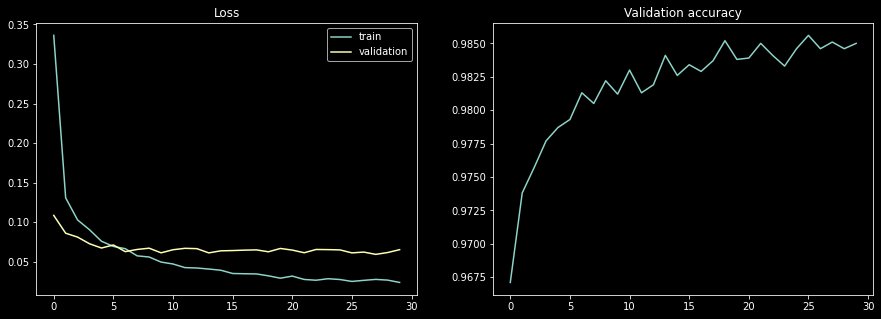

In [91]:
plot_train_process(train_loss, val_loss, val_accuracy)

In [99]:
model.train(False)
out = model(torch.from_numpy(X_test).to(device))
y_pred = out.max(dim=1)[1].cpu()

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9848